In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [4]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [5]:
X.shape

(214, 9)

In [6]:
y.shape

(214,)

In [7]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


____

## Gradient Boosting - StandardScaler

In [ ]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
X_sc

In [ ]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state=42)
X_sc_train.shape, y_train.shape, X_sc_test.shape, y_test.shape

In [ ]:
model= xgb.XGBClassifier()
model.fit(X_sc_train, y_train)

In [ ]:
y_pred = model.predict(X_sc_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

___
## Gradient Boosting Classifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [10]:
params = {'n_estimators': 1500, 'max_depth': 5, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

clf = GradientBoostingClassifier(**params)

In [11]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

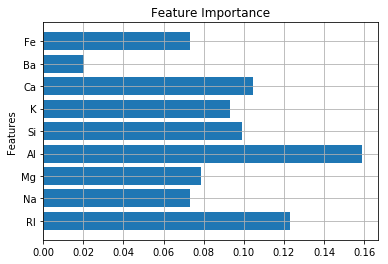

In [12]:
# display the relative importance of each attribute
relval = clf.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(9) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'))
plt.grid(True)

In [13]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [14]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", clf.score(X_test, y_test))

correct: 44
incorrect: 10
accuracy score: 0.8148148148148148


In [16]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0  0  0  0]
 [ 4 15  0  0  1  1]
 [ 2  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
0.8148148148148148


In [19]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.70      1.00      0.82        14
          2       0.88      0.71      0.79        21
          3       1.00      0.50      0.67         4
          5       1.00      0.50      0.67         4
          6       0.75      1.00      0.86         3
          7       0.89      1.00      0.94         8

avg / total       0.85      0.81      0.81        54



___
## Gradient Boosting - Grid Search